## 0. Fashion Mnist 데이터셋 준비

In [ ]:
# keras 라이브러리 가져오기

import tensorflow.keras as keras
# tensorflow : 구글에서 개발한 머신러닝, 딥러닝 프레임워크
# keras      : tensorflow를 사용하기 쉽도록 만든 딥러닝 라이브러리 

In [ ]:
# Fashion MNIST 패션 데이터 로딩하기

fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() 

# load_data() : 전체 데이터셋을 train data와 test data로 자동으로 나누어줌 

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 패션 데이터 탐색하기

print("X_train_full.shape : ", X_train_full.shape)  # 트레인 데이터는 총 60,000개의 28x28사이즈의 이미지로 구성되어있음
print("y_train_full.shape : ", y_train_full.shape)  # 60,000개 트레인 이미지에 대한 정답값
print("X_test.shape : ", X_test.shape)              # 테스트 데이터는 총 10,000개의 28x28사이즈의 이미지로 구성되어있음
print("y_test.shape : ", y_test.shape)              # 10,000개 테스트 이미지에 대한 정답값

X_train_full.shape :  (60000, 28, 28)
y_train_full.shape :  (60000,)
X_test.shape :  (10000, 28, 28)
y_test.shape :  (10000,)


In [ ]:
# 이미지 데이터 하나 살펴보기 

print("y_train_full[0] : ",       y_train_full[0])  # 0번 데이터의 정답값 

print("X_train_full[0].shape : ", X_train_full[0].shape)  # 0번 데이터 이미지의 크기
print("X_train_full[0] : ",       X_train_full[0])  # 0번 데이터 이미지는 0~255의 수로 이루어 짐

y_train_full[0] :  9
X_train_full[0].shape :  (28, 28)
X_train_full[0] :  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88

In [ ]:
import numpy as np
np.unique(y_train_full)  # unique 함수는 데이터에서 서로 겹치지 않는 원소를 출력. 60,000개의 데이터의 겹치지 않는 유니크한 데이터로(0~9) 이루어져있음 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

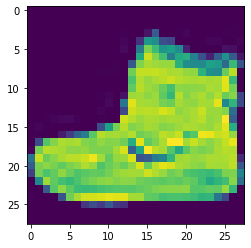

In [ ]:
# 28x28의 데이터를 그림으로 표현하기
import matplotlib.pyplot as plt

# 0번 데이터의 이미지
plt.imshow(X_train_full[0])  # imshow = imageshow # []안에 숫자를 바꾸면 해당 데이터를 보여줌.
plt.show()

In [ ]:
# 0번 데이터의 정답 
y_train_full[0]

9

In [ ]:
# 정답의 각 숫자값에 해당하는 클래스 명 지정하기  
# 여기에는 class 네임을 따로 만들어져있지 않기때문에 직접 class 네임을 분류해줌.

class_names=["T-shirt/top",'Trouser','Pullover','Dress',"Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# 0번 데이터의 클래스 이름 
class_names[y_train_full[0]]

'Ankle boot'

In [ ]:
# 학습용 데이터를 다시 학습용 데이터와 검증용 데이터(valdiation set) 으로 분리 및 정규화
# 학습에 사용은 하지 않으나, 사람이 실험할때 어떻게 사용되는지 확인할떄 쓰는 것임으로 선입견이 생길수도 있으니, 테스트 데이터와 분리해야함. 

X_valid = X_train_full[:5000]/255.0  # 정규화 : 0~255의 수를 0~1의 범위로 맞춰줌  
y_valid = y_train_full[:5000]

X_train = X_train_full[5000:]/255.0
y_train = y_train_full[5000:]

X_test = X_test/255.0

print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("X_test.shape : ", X_test.shape)

X_train.shape :  (55000, 28, 28)
X_valid.shape :  (5000, 28, 28)
X_test.shape :  (10000, 28, 28)


## 1. 학습 모델(인공신경망) 만들기

In [ ]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 2개이며 첫번째 은닉층에 뉴런 300개, 두번째 은닉층에 뉴런 100개 인 골격 만들기
# 활성함수는 relu 사용하기 

my_model = keras.models.Sequential()  # 틀이 잡힌 빈공간, 초기화
my_model.add(keras.layers.Flatten(input_shape=[28,28]))   # Flatten 레이어 : 28x28 2차원 이미지를 1차원 배열로 flatten 
my_model.add(keras.layers.Dense(300, activation="relu"))  # Dense 레이어   : 300개의 뉴런이 있고, 모든 뉴런이 전후 레이어의 모든 뉴런과 연결된 fully connected 레이어
my_model.add(keras.layers.Dense(100, activation="relu"))
my_model.add(keras.layers.Dense(10, activation="softmax"))  # 마지막 출력층은 0~9의 클래스를 예측하기 때문에 10개의 뉴런이 존재하는 Dense 레이어로 정의. softmax 활성화 함수 : 10개 클래스 예측값을 합이 1인 확률값으로 변환. 

# 다른 방법 
# my_model2 = keras.models.Sequential([
#       keras.layers.Flatten(input_shape=[28,28]),
#       keras.layers.Dense(300, activation="relu"),
#       keras.layers.Dense(100, activation="relu"), 
#       keras.layers.Dense(10, activation="softmax")
#     ])

In [ ]:
# 모형의 골격과 학습 가능한 모수(Parameters) 개수 출력하기

my_model.summary()
# 784x300 + 300 = 235,500
# 300x100 + 100 = 30,100
# 100x10  + 10  = 1,010

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모수의 초기값 출력하기
print("model.layers : ", my_model.layers)  # model.layers에 레이어 리스트 저장됨

flatten = my_model.layers[0]
hidden1 = my_model.layers[1]  
hidden2 = my_model.layers[2] 
output  = my_model.layers[3] 

weights, biases = hidden1.get_weights() 

# 가중치 초기값 출력 
print("weights.shape : ", weights.shape)
print("weights : ", weights)
print("biases.shape : ", biases.shape)
print("biases : ", biases)

model.layers :  [<keras.layers.reshaping.flatten.Flatten object at 0x7fd0ad154430>, <keras.layers.core.dense.Dense object at 0x7fd0ad1541c0>, <keras.layers.core.dense.Dense object at 0x7fd0ad14c9d0>, <keras.layers.core.dense.Dense object at 0x7fd0ad154e50>]
weights.shape :  (784, 300)
weights :  [[-0.07112768 -0.02794352 -0.04076407 ... -0.02943843 -0.02442247
  -0.04615216]
 [-0.02919333 -0.045477   -0.00181793 ...  0.05206276  0.04594895
   0.06627607]
 [-0.06349522  0.05181061 -0.02800472 ... -0.06223216  0.01960576
   0.06670599]
 ...
 [ 0.07280745  0.03530072  0.02283514 ...  0.06581827 -0.02066932
  -0.06296863]
 [ 0.05782296  0.01780064 -0.01769223 ... -0.00476415 -0.01600334
  -0.02949615]
 [-0.05751137  0.00368468  0.00810184 ...  0.04958906 -0.0296645
  -0.03705259]]
biases.shape :  (300,)
biases :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# 모델 컴파일하기 (손실함수, 최적화 방법 지정하기)

my_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Categorical Crossentropy : 클래스가 여러 개인 다중 분류 문제에서 사용, label이 원-핫 인코딩 된 형태일 때 사용, (예: 세 가지 클래스 분류에서 라벨이 [1, 0, 0] 또는 [0, 1, 0] 또는 [0, 0, 1]일 때)
# Sparse Categorical Crossentropy : 클래스가 여러 개인 다중 분류 문제에서 사용, label이 정수 인코딩 된 형태일 때 사용, (예: 세 가지 클래스 분류에서 라벨이 0, 1, 2 일 때)

손실함수 종류: https://keras.io/ko/losses/

## 2. 모델 학습하기

In [ ]:
# epoch 길이를 10으로 설정하여 모델 학습하기

history = my_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 25s 13ms/step - loss: 0.4842 - accuracy: 0.8266 - val_loss: 0.4067 - val_accuracy: 0.8482
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3657 - accuracy: 0.8654 - val_loss: 0.3597 - val_accuracy: 0.8674
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3263 - accuracy: 0.8799 - val_loss: 0.3207 - val_accuracy: 0.8852
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3031 - accuracy: 0.8859 - val_loss: 0.3173 - val_accuracy: 0.8864
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2848 - accuracy: 0.8935 - val_loss: 0.3051 - val_accuracy: 0.8884
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2682 - accuracy: 0.8996 - val_loss: 0.3008 - val_accuracy: 0.8926
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2551 - accuracy: 0.9037 - val_loss: 0.2940 - val_accur

## 3. 학습 결과 확인하기

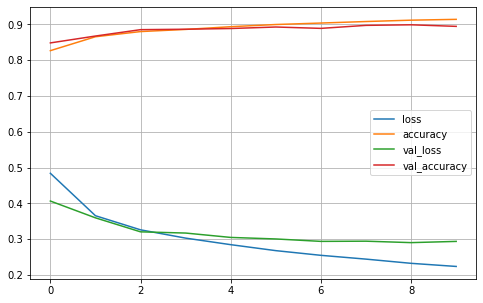

In [ ]:
#학습 곡선 그리기

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

In [ ]:
#학습된 모형으로 새로운 그림이 각 범주에 속할 확률 출력하기

X_new = X_test[:3]                 # 테스트 셋의 0번~2번의 데이터 3개 
y_proba = my_model.predict(X_new)  # predict 함수로 클래스 예측 
y_proba.round(3)                   # 소수 둘 째 자리까지 표현  

1/1 [==============================] - 0s 85ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.009, 0.   ,
        0.991],
       [0.   , 0.   , 0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
#학습된 모형으로 새로운 그림의 범주 예측하기

predict_x = my_model.predict(X_new) 
y_pred    = np.argmax(predict_x, axis=1)  # argmax 함수 : 가장 큰 데이터의 인덱스값 출력 
y_pred

1/1 [==============================] - 0s 17ms/step


array([9, 2, 1])

In [ ]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
# 실제 정답과 비교해보기

y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
# 테스트용 데이터에서의 정분류율 출력하기

my_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.8871


[0.33126968145370483, 0.8870999813079834]

In [ ]:
# 학습된 모델 저장하기

my_model.save("my_keras_model.h5")  # tensorflow는 h5 라는 확장자로 모델 가중치 저장 

In [ ]:
#저장된 모형 로딩하기

load_model = keras.models.load_model("my_keras_model.h5")
predict_x = load_model.predict(X_new) 
y_pred    = np.argmax(predict_x, axis=1)  # argmax 함수 : 가장 큰 데이터의 인덱스값 출력 
y_pred

1/1 [==============================] - 0s 60ms/step


array([9, 2, 1])

## 4. California Housing Price 데이터셋에 신경망 모형 적용하여 회귀분석하기

In [ ]:
#데이터셋 로딩, 데이터셋 분리, 데이터 정규화에 필요한 패키지 로딩하기

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#데이터셋 로딩하기

housing = fetch_california_housing()

In [ ]:
# 데이터를 학습용 데이터와 테스트용 데이터로 나누기
# 학습용 데이터를 다시 학습용 데이터와 검증용 데이터로 나누기

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid         = train_test_split(X_train_full, y_train_full)

In [ ]:
print("X_train_full.shape : ", X_train_full.shape)
print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("X_test.shape : ", X_test.shape)

X_train_full.shape :  (15480, 8)
X_train.shape :  (11610, 8)
X_valid.shape :  (3870, 8)
X_test.shape :  (5160, 8)


In [ ]:
# 데이터 정규화 하기

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [ ]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 1개이며 뉴런이 50개 인 골격 만들기
# 활성함수는 relu 사용하기

model = keras.models.Sequential([
  keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)   # 캘리포니아의 집값을 예측하는 모델 --> output이 하나의 값을 예측
])

In [ ]:
#모형 컴파일하기(손실함수, 최적화 방법 지정하기)

model.compile(loss="mean_squared_error", optimizer="adam")  # 

# Mean Square Error : 특정 값을 예측하기 위한 회귀 문제에서 사용. 평균 제곱 오차. 예측값과 실제값의 오차를 최소화 

In [ ]:
# epoch 길이를 30으로 설정하여 모형 학습하기

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.9736 - val_loss: 0.4699
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4346 - val_loss: 0.4031
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4063 - val_loss: 0.3840
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3870 - val_loss: 0.3820
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3976 - val_loss: 0.3855
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3955 - val_loss: 0.3793
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4362 - val_loss: 0.3693
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3638 - val_loss: 0.3613
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3549 - val_loss: 0.3531
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3550 - val_loss: 0.3605

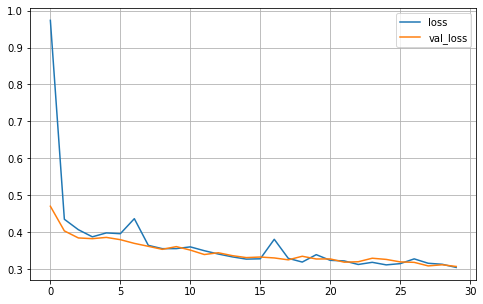

In [ ]:
#학습결과 확인하기

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)



In [ ]:
# 테스트용 데이터에서의 정분류율 출력하기
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3154


In [ ]:
X_new = X_test[:3]

In [ ]:
y_pred=model.predict(X_new)

1/1 [==============================] - 0s 40ms/step


In [ ]:
y_pred

array([[1.0930294],
       [1.7383667],
       [2.1842158]], dtype=float32)

In [ ]:
y_test[:3]

array([1.1  , 1.15 , 3.005])